# Examen Práctico Ordinario 22-23
## Nombre: Arturo Alonso Carbonero

Valor del examen práctico en el curso 3 puntos. Calificación de la práctica sobre 10 puntos.

Duración máxima: 2 horas.

Usaremos los siguiente módulos y librerías 

In [1]:
%matplotlib inline 
import numpy as np

import matplotlib.pyplot as plt

# incluye aquí los módulos adicionales que necesites

import cv2 as cv
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
# from scipy.signal import convolve2d
# import scipy.signal

from skimage import exposure

In [2]:
IMPATH="./imagenes curso/"

### Primer ejercicio (3 puntos)

Escribe código que:

1. Cree una función que admita como entrada una imagen de niveles de gris normalizada al intervalo [0,1] y devuelva el laplaciano de la imagen. Tú defines el tratamiento de los bordes de la imagen. 
2. Lea una imagen como imagen en niveles de gris y la lleve al intervalo [0,1]
3. Ejecute la función que has creado sobre la imagen leída y muestre el resultado incluyendo el mapa de colores

Comenta los diferentes pasos. La función a crear debe usar `NumPy` y ninguna de las funciones de procesamiento de imágenes en los diferentes módulos, librerías y paquetes vistos durante el curso. 

In [3]:
# Función para devolver el laplaciano de una imagen
def laplaciano(imgNorm, centro, c): 
    # Núcleo a aplicar
    N2,M2=imgNorm.shape
    kernel=np.zeros((N2,M2))
    kernel[1][1]=centro
    kernel[0][1], kernel[1][0], kernel[0][M2-1], kernel[N2-1][0]=c,c,c,c
    
    freqimgNorm=np.fft.fft2(imgNorm)
    freqKernel=np.fft.fft2(kernel)
    laplace=np.round((np.fft.ifft2(freqimgNorm*freqKernel).real)).astype(np.double)
    # laplace=scipy.signal.convolve2d(imgNorm, kernel, 'same', boundary='wrap')
    
    return laplace

# Función para normalizar una imagen al intervalo [a,b]
def normalizarAB(s, a, b):
    start=a
    end=b
    width=end-start
    res=(s-s.min())/(s.max()-s.min())*width+start
    return res

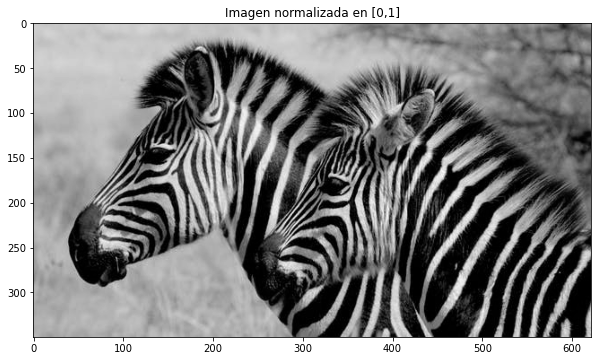

In [4]:
# Lectura de la imagen
filename=IMPATH+"zebras.jpg"
img=cv.imread(filename)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Paso a escala de grises
imgG=cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Normalización al intervalo [0,1]
a=0
b=1
imgNorm=normalizarAB(imgG, a, b)
plt.figure(figsize=(10,10))
plt.title("Imagen normalizada en [0,1]")
_=plt.imshow(imgNorm, cmap='gray')

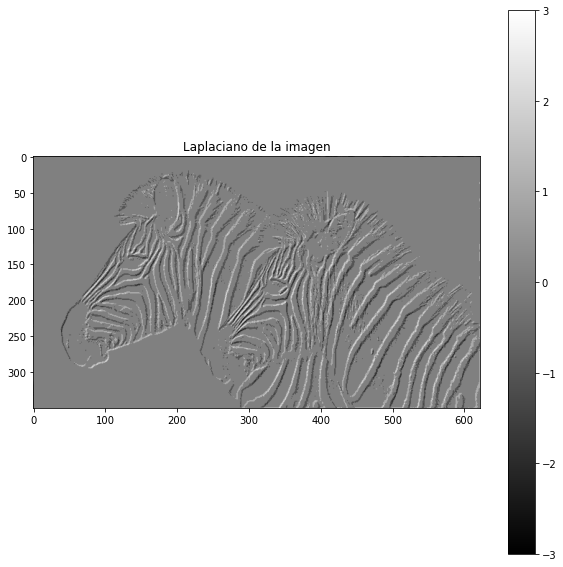

In [5]:
# Al utilizar el valor -4 en el centro y c=1 (vecinos directos del centro), la suma de la nueva
# imagen vale 0, por lo que se pierde la media
centro=-4
c=1
lImg=laplaciano(imgNorm, centro, c)

# Muestro la imagen resultado
plt.figure(figsize=(10,10))
plt.title("Laplaciano de la imagen")
_=plt.imshow(lImg, cmap='gray'), plt.colorbar()

### Segundo ejercicio (3 puntos)

1. Lee y muestra la imagen `lowcontrast.png`,
2. Muestra su histograma y
3. Aumenta el contraste de la imagen usando técnicas basadas en la transformación del histograma. 

Puedes usar funciones de librerías de Python pero debes explicar lo que hacen dichas funciones.

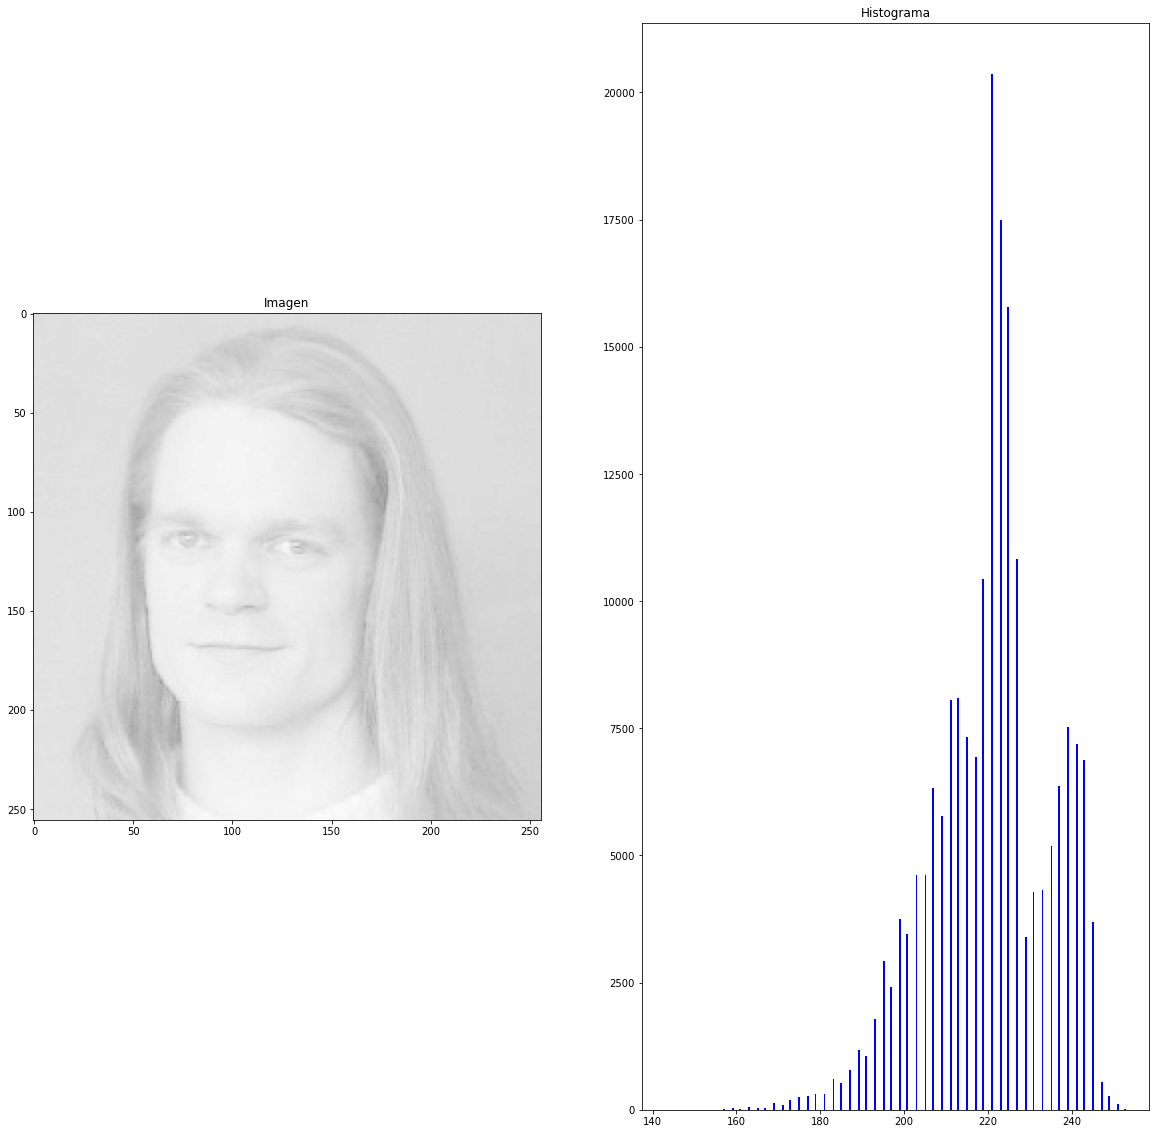

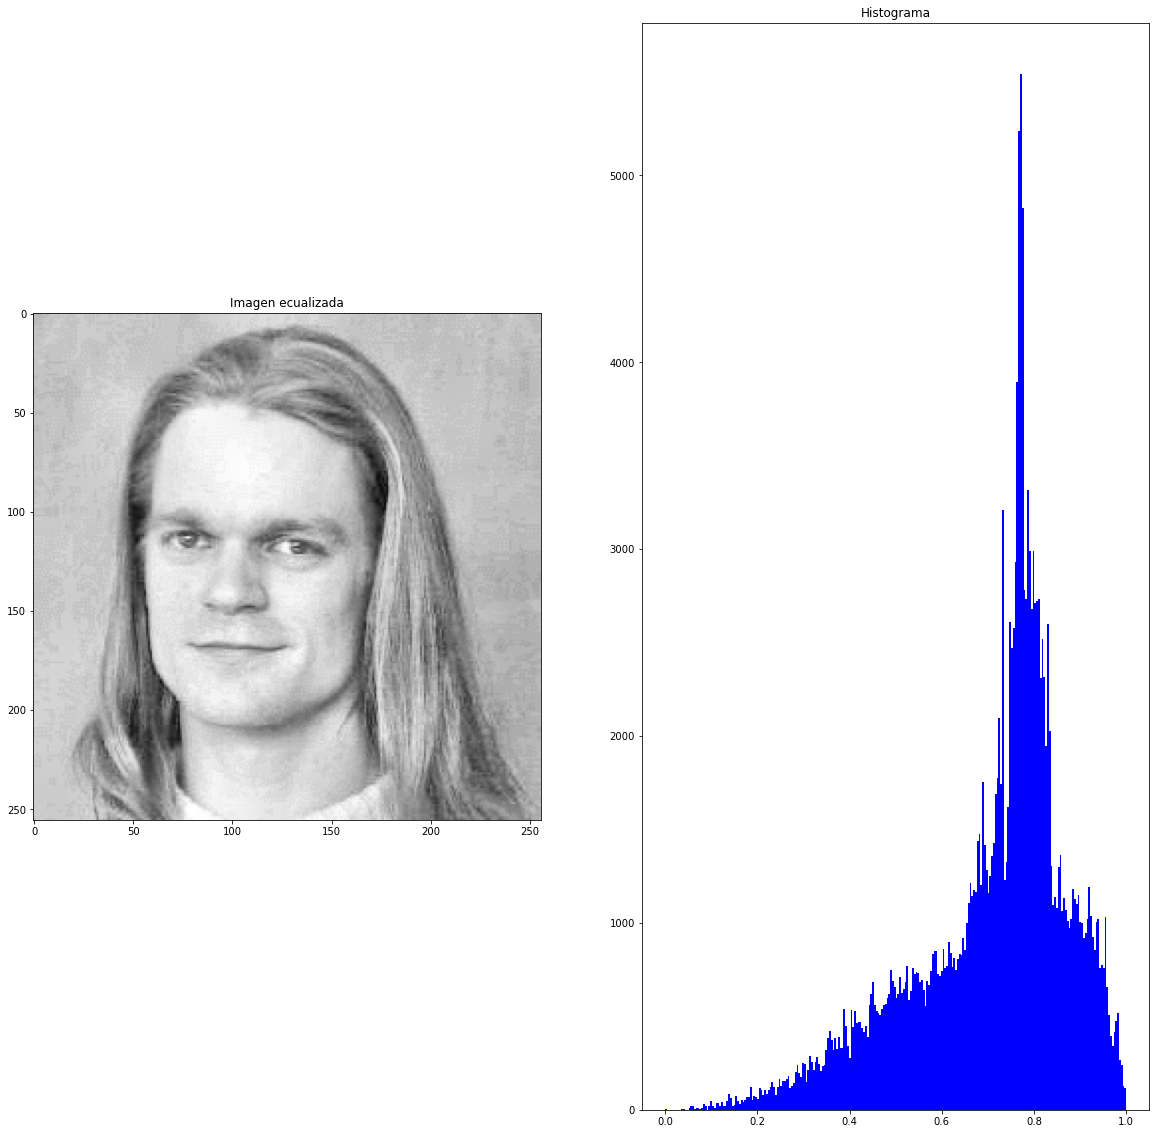

In [6]:
# Lectura de la imagen
filename=IMPATH+"lowcontrast.png"
img=cv.imread(filename)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Imagen")
_=plt.imshow(img, cmap='gray')

# Histograma
plt.subplot(122)
plt.title("Histograma")
_=plt.hist(img.ravel(), color='b', bins=256)

# Ecualización adaptativa y nuevo histograma
# La ecualización devuelve un histograma plano de la imagen
# Al utilizar ecualización adaptativa, se conservan mejor los detalles (la forma de los histogramas es similar)
imgAdapteq=exposure.equalize_adapthist(img, clip_limit=0.03)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Imagen ecualizada")
_=plt.imshow(imgAdapteq, cmap='gray')

plt.subplot(122)
plt.title("Histograma")
_=plt.hist(imgAdapteq.ravel(), color='b', bins=256)

### Tercer ejercicio (4 puntos)

1. Lee y muestra la imagen `sharpening.jpg`,
2. Realza la imagen usando el laplaciano

No puedes puedes usar funciones de librerías de Python. La imagen realzada debe estar en el rango [0,255] Debes explicar los pasos que realizas

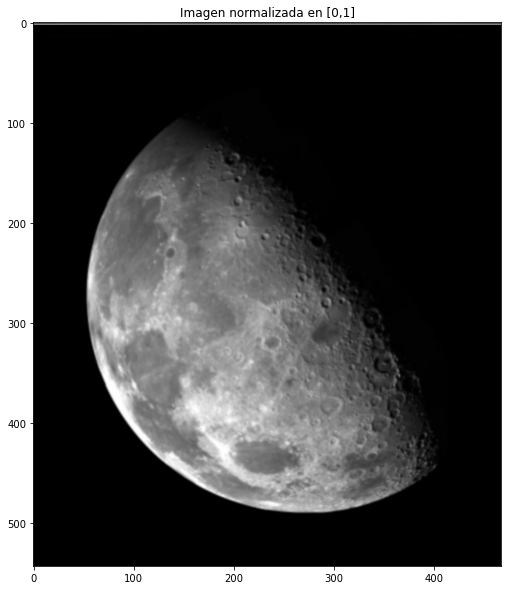

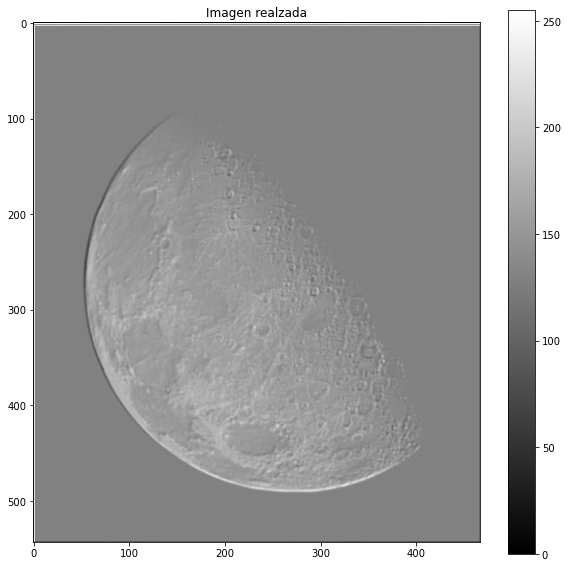

In [25]:
# Lectura de la imagen
filename=IMPATH+"sharpening.jpg"
img=cv.imread(filename)
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Paso a escala de grises
imgG=cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Muestro la imagen original
plt.figure(figsize=(10,10))
plt.title("Imagen normalizada en [0,1]")
_=plt.imshow(imgG, cmap='gray')

# Aplico la función del paso 1 para un núcleo con 5 en la posición central y c=-1
# Esto realza las frecuencias altas de la imagen
centro=5
c=-1
lImg=laplaciano(imgG, centro, c)

# Normalización al intervalo [0,255]
a=0
b=255
imgRes=normalizarAB(lImg, a, b)

# Muestro la imagen resultado
plt.figure(figsize=(10,10))
plt.title("Imagen realzada")
_=plt.imshow(imgRes, cmap='gray'), plt.colorbar()